<a href="https://www.kaggle.com/code/piotrpowroznik/digits-recognizer-keras?scriptVersionId=261509626" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digits Recognizer With Keras

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from torch.utils.data import Dataset, DataLoader
import pandas as pd

## 1.1 Load Data

In [3]:
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

## 1.2 View Data
Data contains of two tables, first test.csv with 28000 images and second train.csv containing 42000. Each digit is represented by 784 pixels vectors which gives 28x28 pixels images. Training dataset comes also with label column showing which digit images is showing.

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.3 Data Preparation

In [5]:
x_train = train_df.iloc[:, 1:] / 255
y_train = train_df.loc[:, 'label']

x_test = test_df / 255

x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

## 1.4 Digits Distribution

(42000, 28, 28, 1)
(28000, 28, 28, 1)
1.0


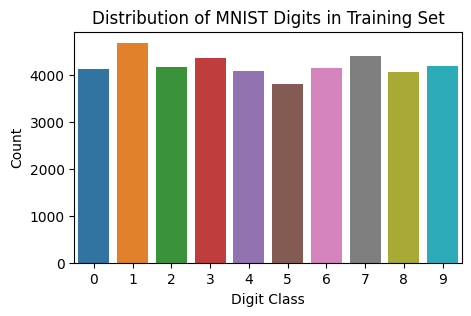

In [6]:
import seaborn as sns
print (x_train.shape)
print (x_test.shape)

print (x_test.max())

plt.figure(figsize=(5, 3))
sns.countplot(x=y_train)
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.title("Distribution of MNIST Digits in Training Set")
plt.show()

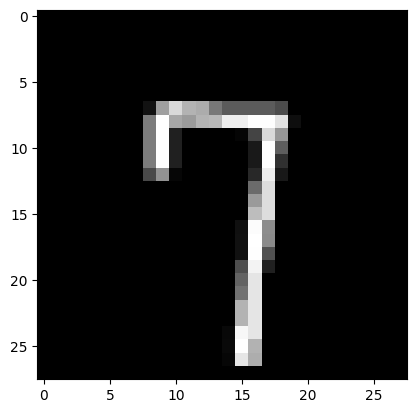

In [7]:
plt.imshow(x_train[50][:,:,0], cmap='gray')

## 1.5 Convert To Categorical

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_train.shape

(42000, 10)

## 1.6 Split Training Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=28)

In [10]:
print (X_train.shape)
print (X_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


# 2. CNN Model

## 2.1 Define Model Architecture

In [11]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', 
                  input_shape=(28, 28, 1)),
    layers.Dropout(0.3),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),   
    layers.Dropout(0.3),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),

    layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 2.2 Show Model

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         100,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,530 (466.91 KB)

 Trainable params: 119,530 (466.91 KB)

 Non-trainable params: 0 (0.00 B)

## 2.3 Compile Model

In [13]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 2.4 Train Model

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
 
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

In [15]:
history = model.fit(X_train, 
    Y_train, 
    epochs=30,
    batch_size=50,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.7464 - loss: 0.7587 - val_accuracy: 0.9700 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 2/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9373 - loss: 0.2068 - val_accuracy: 0.9776 - val_loss: 0.0861 - learning_rate: 0.0010
Epoch 3/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9547 - loss: 0.1471 - val_accuracy: 0.9821 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 4/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9603 - loss: 0.1291 - val_accuracy: 0.9871 - val_loss: 0.0575 - learning_rate: 0.0010
Epoch 5/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9650 - loss: 0.1096 - val_accuracy: 0.9867 - val_loss: 0.0468 - learning_rate: 0.0010
Epoch 6/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.9674 - loss: 0.1040 - val_accuracy: 0.9902 - val_loss: 0.0411 - learning_rate: 0.0010
Epoch 7/30
756/756 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9706 - l

# 3. Evaluate The Model

## 3.1 Learning Curves

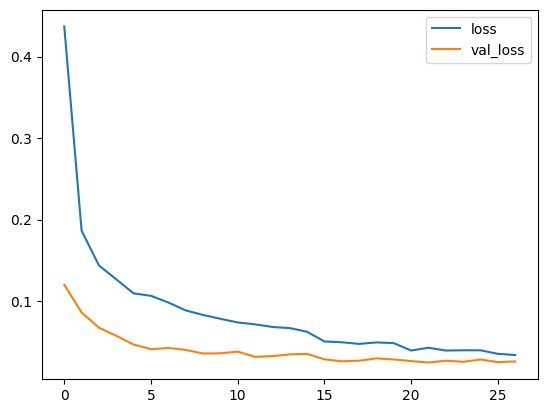

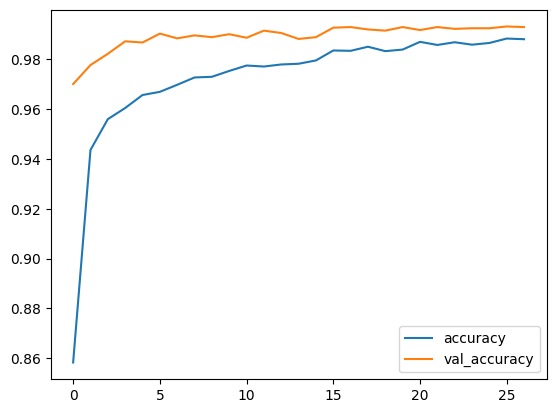

In [16]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

## 3.2 Confussion Matrix

In [17]:
Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1)

Y_true = np.argmax(Y_val,axis = 1) 


132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


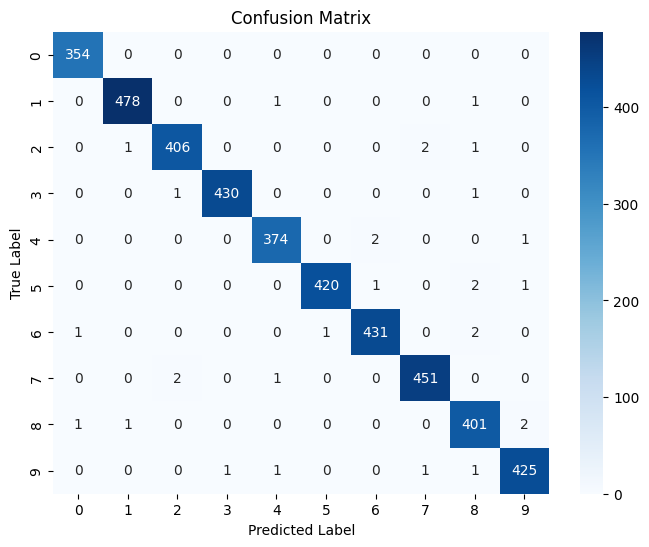

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_true, Y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [19]:
model.save("mnist_model.h5")

In [20]:
predicted_labels = model.predict(x_test)
predicted_labels = np.argmax(predicted_labels,axis = 1)

submission = pd.DataFrame({"ImageId": np.arange(1, len(predicted_labels) + 1), "Label": predicted_labels})


875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [21]:
submission.to_csv("submission.csv", index=False)
